In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
co2f = pd.read_csv('NorESM1ME_mat_ts_21_CO2full.txt', header=None, delim_whitespace=True)
co2p = pd.read_csv('NorESM1ME_mat_ts_21_CO2phys.txt', header=None, delim_whitespace=True)
co2r = pd.read_csv('NorESM1ME_mat_ts_21_CO2rad.txt', header=None, delim_whitespace=True)

In [4]:
col_names =["CO2", "Shortwave Downwelling", "Shortwave Upwelling", "Longwave Downwelling", 
"Longwave Upwelling", "Surface Air Temp", "Surface Relative Humidity",
"Surface Winds", "Latent Heat Flux", "Sensible Heat Flux",
"Precipitation", "Total Moisture", "Runoff", "GPP", "LAI", "Transpiration",
"WUE", "Precipitation minus Evaporation"]

In [5]:
co2f.columns = col_names
co2p.columns = col_names
co2r.columns = col_names

In [6]:
sigma = 5.67*10**(-8)
lam = 2.45*10**6
Rv=461
sperday=60*60*24
gamma=0.0665

# Question 1

In [7]:
co2f["Albedo"] = co2f["Shortwave Upwelling"]/co2f["Shortwave Downwelling"]
co2p["Albedo"] = co2p["Shortwave Upwelling"]/co2p["Shortwave Downwelling"]
co2r["Albedo"] = co2r["Shortwave Upwelling"]/co2r["Shortwave Downwelling"]

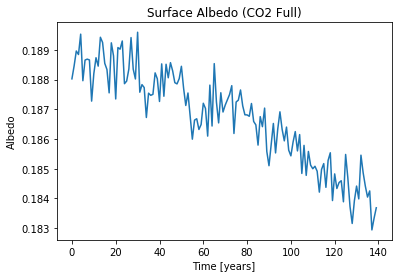

In [8]:
plt.title("Surface Albedo (CO2 Full)")
plt.xlabel("Time [years]")
plt.ylabel("Albedo")
plt.plot(co2f["Albedo"])

In [9]:
aver_albedo_diff = sum(co2f['Albedo'][120:140])/20-sum(co2f['Albedo'][0:20])/20
print(aver_albedo_diff)

-0.004348918652979511


The surface albedo goes down as CO2 goes up. The difference in the averages between the first 20 years of data and the last 20 years indicates that it has gone down by about 0.004. This is sort of as expected as we know that with rising CO2 levels, the temperature of the earth is warming, which can in part be due to CO2 trapping more of the incoming shortwave radiation. If more shortwave radiation is trapped, as less is reflected, then the albedo will go down.

# Question 2

In [10]:
co2f["Longwave Upwelling Calc"]=sigma*(co2f["Surface Air Temp"]**4)
co2p["Longwave Upwelling Calc"]=sigma*(co2p["Surface Air Temp"]**4)
co2r["Longwave Upwelling Calc"]=sigma*(co2r["Surface Air Temp"]**4)

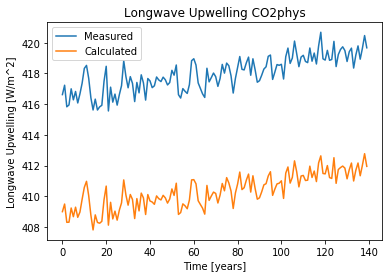

In [11]:
plt.title("Longwave Upwelling CO2phys")
plt.xlabel("Time [years]")
plt.ylabel("Longwave Upwelling [W/m^2]")
plt.plot(co2p["Longwave Upwelling"], label = "Measured")
plt.plot(co2p["Longwave Upwelling Calc"], label = "Calculated")
plt.legend(loc='upper left')

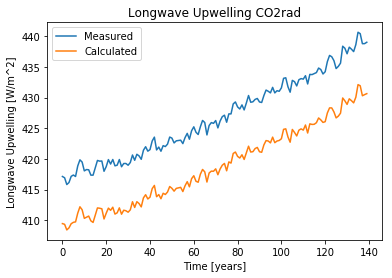

In [12]:
plt.title("Longwave Upwelling CO2rad")
plt.xlabel("Time [years]")
plt.ylabel("Longwave Upwelling [W/m^2]")
plt.plot(co2r["Longwave Upwelling"], label = "Measured")
plt.plot(co2r["Longwave Upwelling Calc"], label = "Calculated")
plt.legend(loc='upper left')

# a)
    For both CO2phys and CO2rad the measured longwave upwelling is greater than the calculated longwave upwelling.

# Question 3

In [13]:
####Step 1
def get_eT(T):
    return 0.6108*math.exp((lam/Rv)*((1/273.15)-(1/T)))

co2f["eT"] = co2f['Surface Air Temp'].map(get_eT)
co2p["eT"] = co2p['Surface Air Temp'].map(get_eT)
co2r["eT"] = co2r['Surface Air Temp'].map(get_eT)

In [14]:
####Step 2
def get_del(T, eT):
    return (lam/Rv)*(eT/(math.pow(T,2)))

co2f['del'] = co2f[['Surface Air Temp','eT']].apply(lambda x: get_del(*x), axis=1)
co2p['del'] = co2p[['Surface Air Temp','eT']].apply(lambda x: get_del(*x), axis=1)
co2r['del'] = co2r[['Surface Air Temp','eT']].apply(lambda x: get_del(*x), axis=1)

In [15]:
####Step 3
### Note my data is missing wind speed.
def get_PET(RH, LH, SH, T, eT, Del):
    num = 0.0352*Del*(LH+SH) + gamma*(900/T)*eT*(1-RH)
    denom = Del + gamma*(1.34)
    return num/denom

co2f['PET'] = co2f[['Surface Relative Humidity', 'Latent Heat Flux', 'Sensible Heat Flux', 'Surface Air Temp', 'eT', 'del']].apply(lambda x: get_PET(*x), axis=1)
co2p['PET'] = co2p[['Surface Relative Humidity', 'Latent Heat Flux', 'Sensible Heat Flux', 'Surface Air Temp', 'eT', 'del']].apply(lambda x: get_PET(*x), axis=1)
co2r['PET'] = co2r[['Surface Relative Humidity', 'Latent Heat Flux', 'Sensible Heat Flux', 'Surface Air Temp', 'eT', 'del']].apply(lambda x: get_PET(*x), axis=1)

In [16]:
####Step 4

co2f['AET']=co2f['Latent Heat Flux']*(sperday/lam)
co2p['AET']=co2p['Latent Heat Flux']*(sperday/lam)
co2r['AET']=co2r['Latent Heat Flux']*(sperday/lam)

# a)
        PET is the potential evaotranspiration rate, so it tells us how much water could evaporate provided there is enough water at the surfact to evaporate. In regards to the surface energy budget it gives us an indication of how much energy is at the surface. A high PET indicates more energy at the surface as compared to a low PET.

# b)

Text(0.5, 0, 'Time [years]')

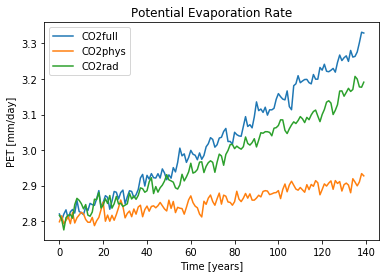

In [17]:
plt.plot(co2f['PET'], label='CO2full')
plt.plot(co2p['PET'], label='CO2phys')
plt.plot(co2r['PET'], label='CO2rad')
plt.legend(loc='upper left')
plt.title('Potential Evaporation Rate')
plt.ylabel('PET [mm/day]')
plt.xlabel('Time [years]')

From the plot above we see that the PET increase for each of the three experiments. As the CO2 levels increase, we already showed that the amount of reflected shortwave radiation decreases, which in turn means that there is an increase in the total surface energy. With an increase in surface level energy we would expect the temperature to rise and thus we would expect to see an increase in the potential evapotranspiration rate as increased temperature leads to an increase in both transpiration and evaporation.

# c)

Text(0.5, 0, 'Time [years]')

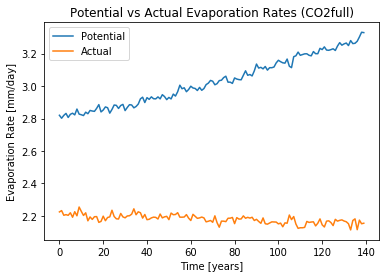

In [18]:
plt.plot(co2f['PET'], label='Potential')
plt.plot(co2f['AET'], label='Actual')
plt.legend(loc='upper left')
plt.title('Potential vs Actual Evaporation Rates (CO2full)')
plt.ylabel('Evaporation Rate [mm/day]')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

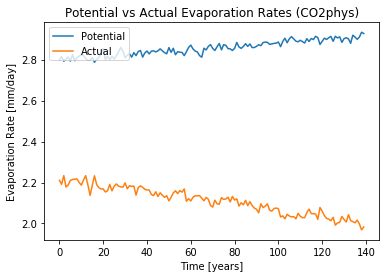

In [19]:
plt.plot(co2p['PET'], label='Potential')
plt.plot(co2p['AET'], label='Actual')
plt.legend(loc='upper left')
plt.title('Potential vs Actual Evaporation Rates (CO2phys)')
plt.ylabel('Evaporation Rate [mm/day]')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

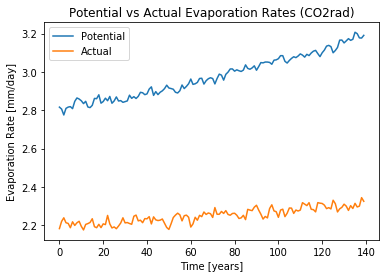

In [20]:
plt.plot(co2r['PET'], label='Potential')
plt.plot(co2r['AET'], label='Actual')
plt.legend(loc='upper left')
plt.title('Potential vs Actual Evaporation Rates (CO2rad)')
plt.ylabel('Evaporation Rate [mm/day]')
plt.xlabel('Time [years]')

For each of the three experiments, the potential evaporation rate is higher than the actual evaporation rate. s

In [21]:
print(co2f['Precipitation'], co2f['Precipitation minus Evaporation'])

0      2.813451
1      2.925708
2      2.864338
3      2.843186
4      2.926987
         ...   
135    3.016324
136    2.934097
137    2.965569
138    2.890711
139    3.016830
Name: Precipitation, Length: 140, dtype: float64 0      0.634755
1      0.739095
2      0.705816
3      0.680841
4      0.768780
         ...   
135    0.879206
136    0.862273
137    0.836035
138    0.783094
139    0.905987
Name: Precipitation minus Evaporation, Length: 140, dtype: float64


Text(0.5, 0, 'Time [years]')

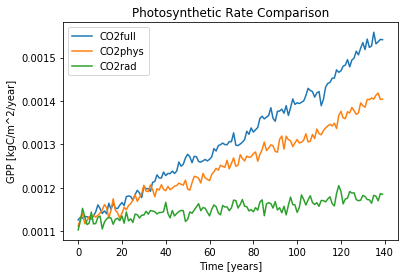

In [23]:
plt.plot(co2f['GPP']*sperday*365, label='CO2full')
plt.plot(co2p['GPP']*sperday*365, label='CO2phys')
plt.plot(co2r['GPP']*sperday*365, label='CO2rad')
plt.legend(loc='upper left')
plt.title('Photosynthetic Rate Comparison')
plt.ylabel('GPP [kgC/m^2/year]')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

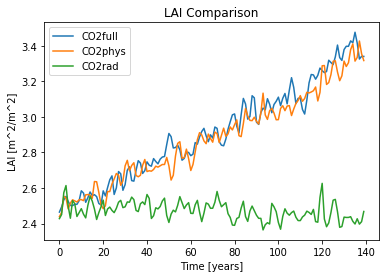

In [24]:
plt.plot(co2f['LAI'], label='CO2full')
plt.plot(co2p['LAI'], label='CO2phys')
plt.plot(co2r['LAI'], label='CO2rad')
plt.legend(loc='upper left')
plt.title('LAI Comparison')
plt.ylabel('LAI [m^2/m^2]')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

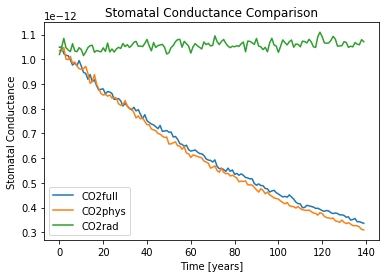

In [31]:
plt.plot(12.7*co2f['GPP']*co2f['Surface Relative Humidity']/co2f['CO2'], label='CO2full')
plt.plot(12.7*co2p['GPP']*co2p['Surface Relative Humidity']/co2p['CO2'], label='CO2phys')
plt.plot(12.7*co2r['GPP']*co2r['Surface Relative Humidity']/284, label='CO2rad')
plt.legend(loc='lower left')
plt.title('Stomatal Conductance Comparison')
plt.ylabel('Stomatal Conductance')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

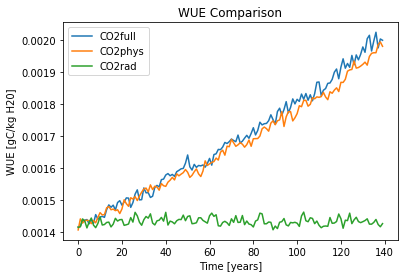

In [35]:
plt.plot(co2f['WUE'], label='CO2full')
plt.plot(co2p['WUE'], label='CO2phys')
plt.plot(co2r['WUE'], label='CO2rad')
plt.legend(loc='upper left')
plt.title('WUE Comparison')
plt.ylabel('WUE [gC/kg H20]')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

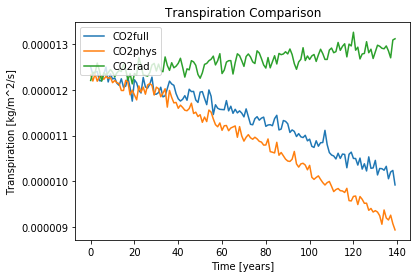

In [36]:
plt.plot(co2f['Transpiration'], label='CO2full')
plt.plot(co2p['Transpiration'], label='CO2phys')
plt.plot(co2r['Transpiration'], label='CO2rad')
plt.legend(loc='upper left')
plt.title('Transpiration Comparison')
plt.ylabel('Transpiration [kg/m^2/s]')
plt.xlabel('Time [years]')

Text(0.5, 0, 'Time [years]')

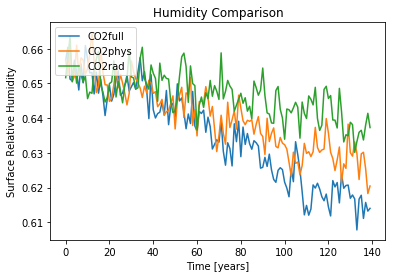

In [37]:
plt.plot(co2f['Surface Relative Humidity'], label='CO2full')
plt.plot(co2p['Surface Relative Humidity'], label='CO2phys')
plt.plot(co2r['Surface Relative Humidity'], label='CO2rad')
plt.legend(loc='upper left')
plt.title('Humidity Comparison')
plt.ylabel('Surface Relative Humidity')
plt.xlabel('Time [years]')